# Exploratory Data Analysis (EDA) Solar Prediction Project

This notebook performs exploratory data analysis on solar radiation data collected
from Benin, Sierra Leone, and Togo. The goal is to understand data quality,
identify important patterns, and prepare insights for modeling Global Horizontal Irradiance (GHI).

## 1.Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

## 2.Load Dataset

In [17]:
url1 = 'https://raw.githubusercontent.com/Eba-Fekadu/Machine_Learning_Capstone_Project_1/main/data/benin-malanville.csv'

df1 = pd.read_csv(url1)

# Quick preview of Benin data
print("Quick preview of Benin data\n", df1.head())

url2 = "https://raw.githubusercontent.com/Eba-Fekadu/Machine_Learning_Capstone_Project_1/main/data/sierraleone-bumbuna.csv"
df2 = pd.read_csv(url2)

# Quick preview of data

print("Quick preview of Sierra Leon data\n", df2.head())

url3 = "https://raw.githubusercontent.com/Eba-Fekadu/Machine_Learning_Capstone_Project_1/main/data/togo-dapaong_qc.csv"
df3 = pd.read_csv(url3)

# Quick preview of data

print("Quick preview of Togo dopaong data\n", df3.head())


Quick preview of Benin data
           Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4    

## 3.Basic Information

In [18]:
# summary statistics of df1 (Benin data)
print("Information of Benin data\n", df1.info())
print("Shape of Benin data\n", df1.shape)
# missing value of Benin data
print("Missing value of Benin data\n", df1.isnull().sum())
# data type of Benin data
print("Data type of Benin data\n", df1.dtypes)
# description of Benin data
print("Description of Benin data\n", df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [19]:
# summary statistics of df2 (Siera-leone data)
print("Information of Sierra Leon data\n", df2.info())
print("Shape of Sierra Leon data\n", df2.shape)
# missing value of Sierra Leon data
print("Missing value of Sierra Leon data\n", df2.isnull().sum())
# data type of Sierra Leon data
print("Data type of Sierra Leon data\n", df2.dtypes)
# description of Sierra Leon data
print("Description of Sierra Leon data\n", df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [20]:
# summary statistics of df3 (Togo data)
print("Information of Togo data\n", df3.info())
print("Shape of Togo data\n", df3.shape)
# missing value of Togo data
print("Missing value of Togo data\n", df3.isnull().sum())
# data type of Togo data
print("Data type of Togo data\n", df3.dtypes)
# description of Togo data
print("Description of Togo data\n", df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [21]:
# Add a “country” column to each dataset
df1['Country'] = 'Benin'
df2['Country'] = 'Sierra Leone'
df3['Country'] = 'Togo'

# Allows country-based EDA
# Helps detect differences between climates
# Prevents Data Mixing


### All three data sets have equal number of features and rows. To work as a group , we will join the three datasets into one dataset.

In [22]:
# Combine the three datasets into one dataset
df = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined dataset shape:", df.shape)
print(df.head())

Combined dataset shape: (1576800, 20)
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Country  
0       NaN   Benin  
1       NaN   Benin  


In [23]:
# Shape of the combined dataset
print("Shape of the combined dataset\n", df.shape)

# Information of the combined dataset
print("Information of the combined dataset\n")
df.info()

# Summary statistics
print("\nSummary Statistics of the combined dataset\n")
print(df.describe().T)

# Numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

print("\nSummary Statistics of Numeric Columns\n")
print(numeric_df.describe().T)

Shape of the combined dataset
 (1576800, 20)
Information of the combined dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  157

<Axes: >

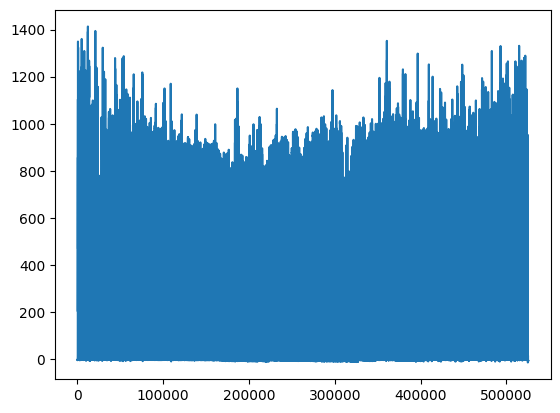

In [24]:
df[df['Country'] == 'Benin']['GHI'].plot()


<Axes: >

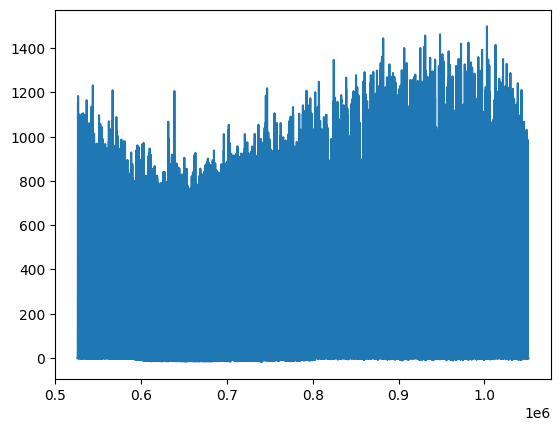

In [25]:
df[df['Country'] == 'Sierra Leone']['GHI'].plot()


<Axes: >

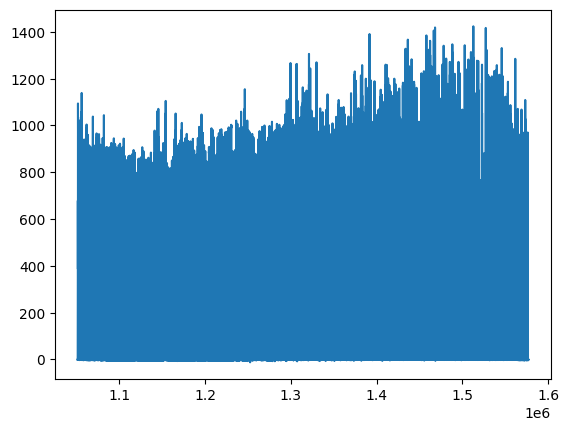

In [26]:

df[df['Country'] == 'Togo']['GHI'].plot()

## 4.Missing Values Analysis

In [27]:
# Drop this column because it has irrelevant text
if 'Comments' in df.columns:
    df = df.drop(columns=['Comments'])

df.isna().sum()


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Country          0
dtype: int64

## 5. Summary Statistics

In [28]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,1576800.0,224.357336,318.107274,-19.5,-2.2,1.2,424.4,1499.0
DNI,1576800.0,144.940774,245.378143,-7.8,-0.2,0.0,227.0,1004.5
DHI,1576800.0,115.174628,158.060218,-17.9,-1.4,1.4,219.0,892.0
ModA,1576800.0,223.125655,315.473164,0.0,0.0,4.1,411.1,1507.0
ModB,1576800.0,215.522285,304.943853,0.0,0.0,4.0,397.3,1473.0
Tamb,1576800.0,27.416955,5.131024,11.0,23.7,26.8,31.0,43.8
RH,1576800.0,62.983329,28.543656,2.1,38.6,69.0,88.6,100.0
WS,1576800.0,1.878440,1.536357,0.0,0.6,1.8,2.8,19.5
WSgust,1576800.0,2.576763,1.961275,0.0,1.1,2.4,3.6,26.6
WSstdev,1576800.0,0.464984,0.290400,0.0,0.4,0.5,0.6,4.7


## 6. Outlier Detection

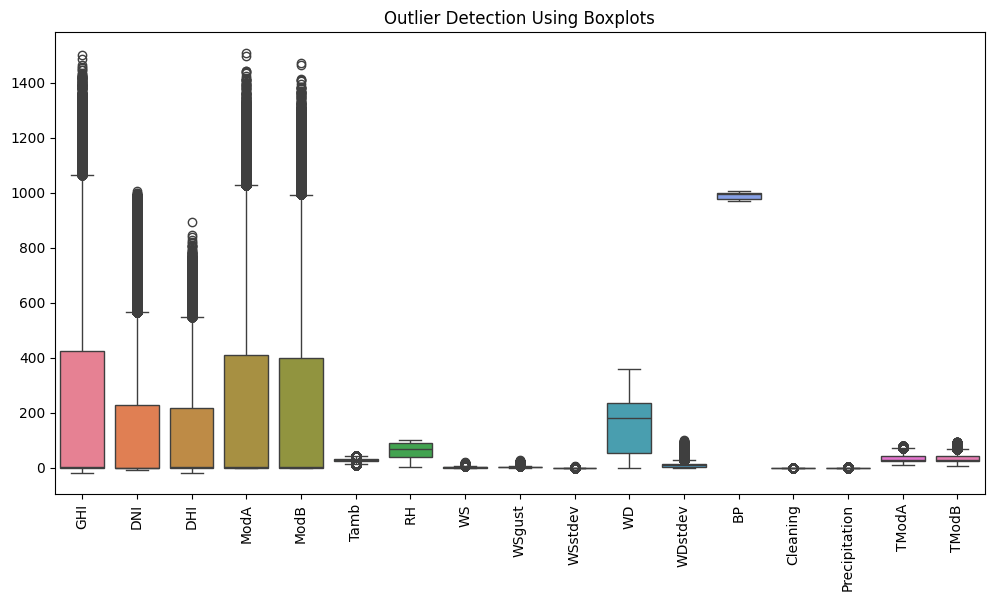

In [29]:
#Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplots")
plt.show()

In [30]:
#Isolation Forest

numeric_df = df.select_dtypes(include=['float64','int64'])

iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(numeric_df)

df['Outlier'] = outliers
df = df[df['Outlier'] == 1]  # Keep only normal data
 

df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,Outlier
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin,1
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin,1
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin,1
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin,1
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin,1


## 7. Time-Series Analysis

In [31]:
# Convert Timestamp and Sort
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

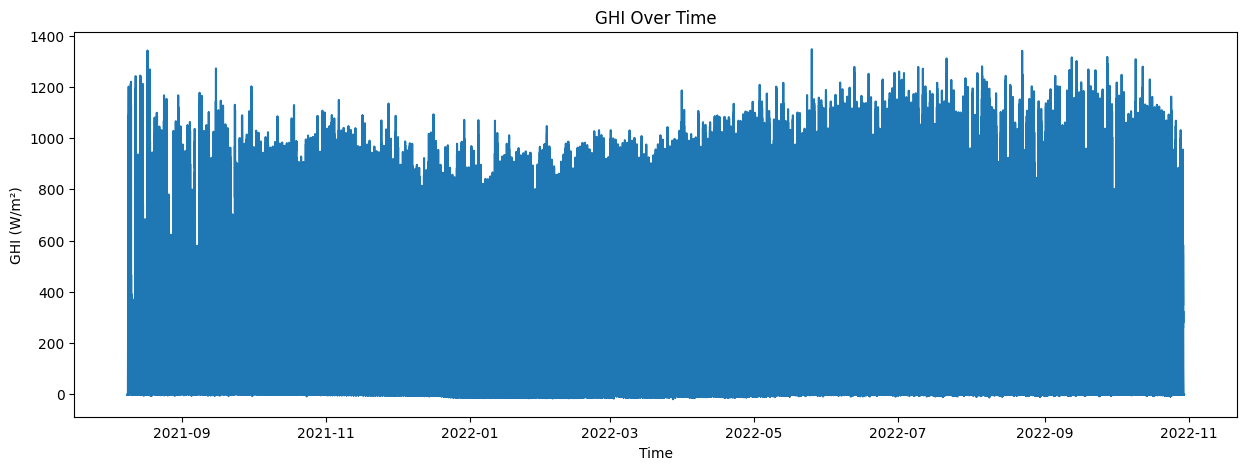

In [32]:
#Trend Plot
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['GHI'])
plt.title("GHI Over Time")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.show()

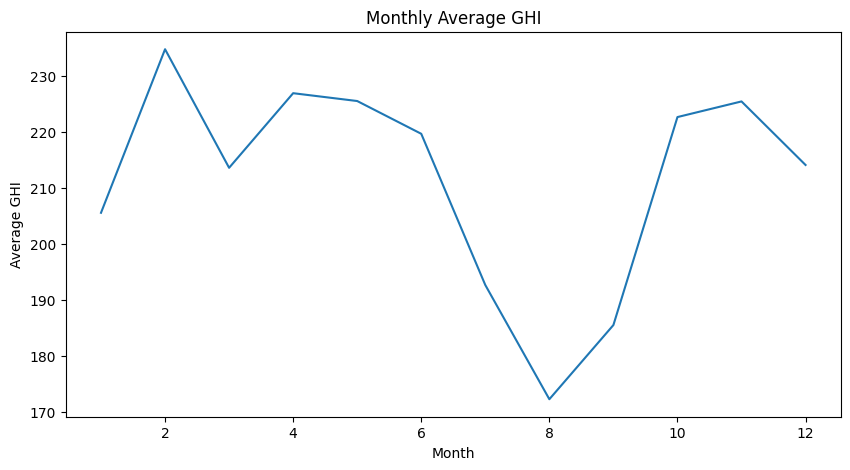

In [33]:
#Monthly Trends
df['Month'] = df['Timestamp'].dt.month

df.groupby('Month')['GHI'].mean().plot(kind='line', figsize=(10,5))
plt.title("Monthly Average GHI")
plt.ylabel("Average GHI")
plt.show()

## 8. Correlation Analysis

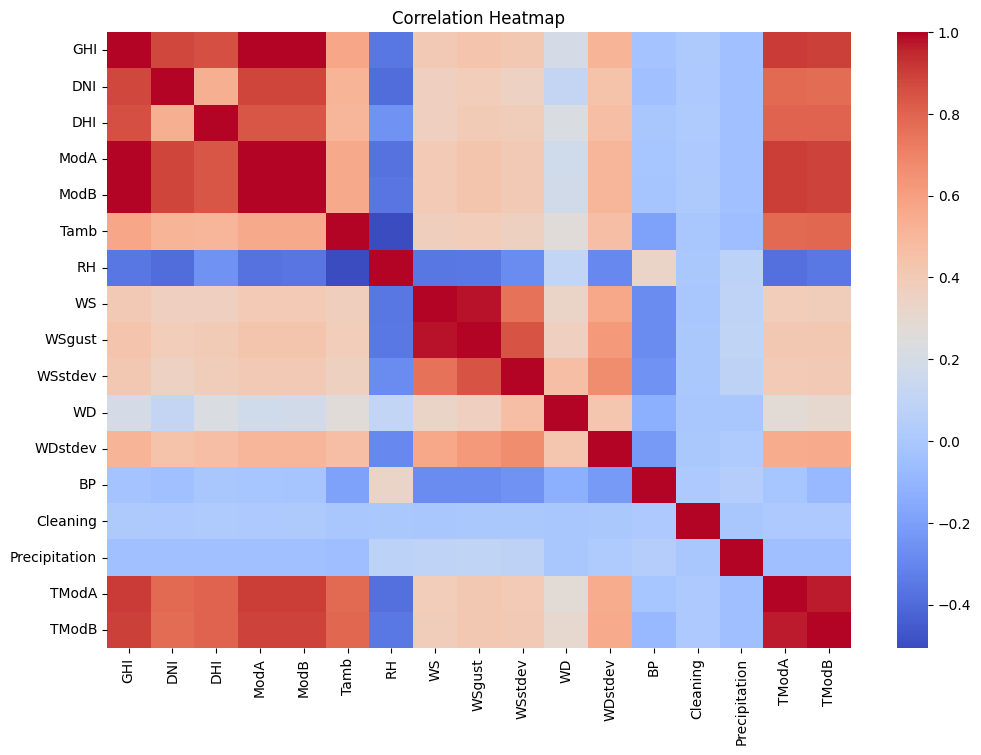

In [34]:
#Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

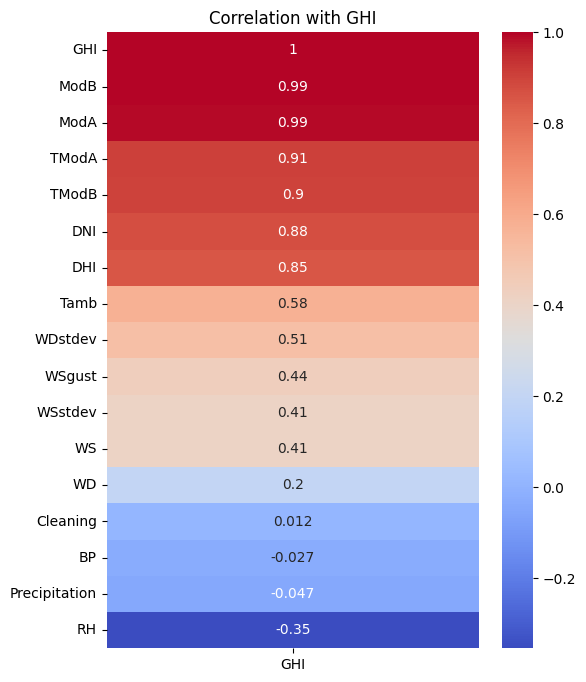

In [35]:
#Correlation with GHI Only
plt.figure(figsize=(6,8))
sns.heatmap(numeric_df.corr()[['GHI']].sort_values(by='GHI', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with GHI")
plt.show()

## 9. Distribution Analysis

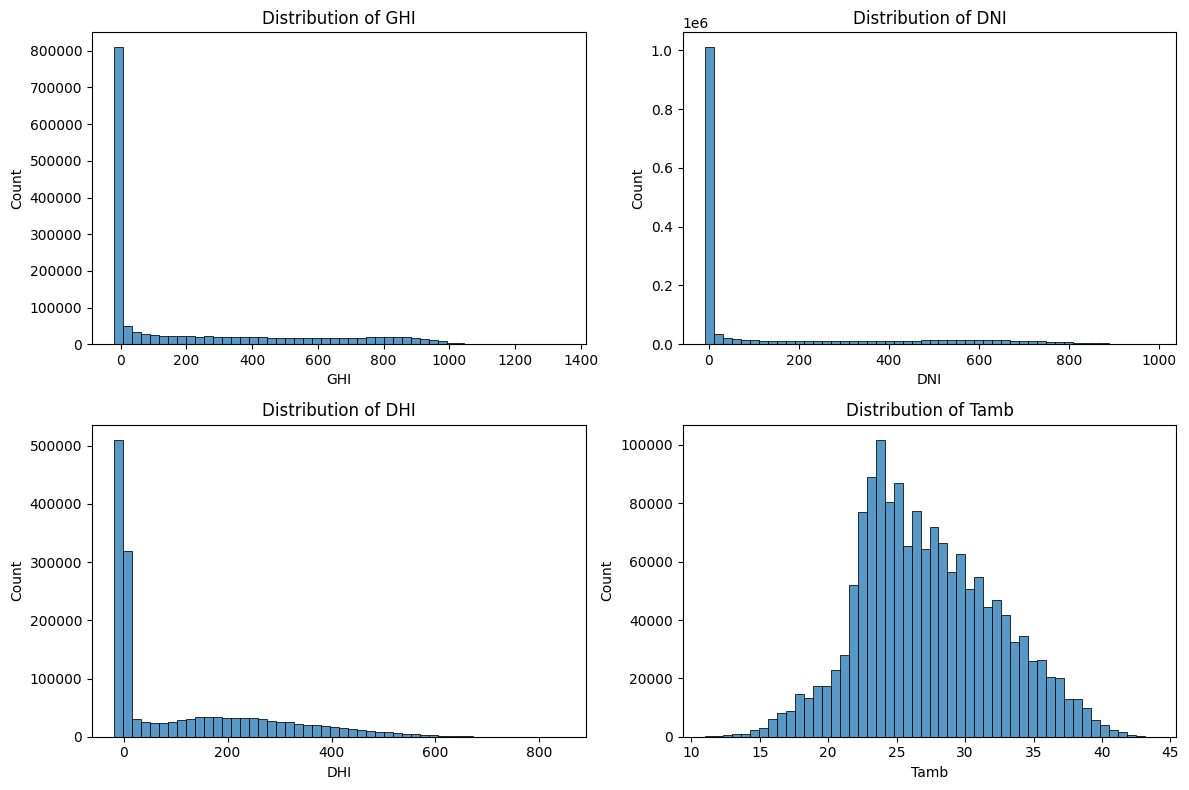

In [36]:
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], bins=50)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# 10. Feature Relationship Plots

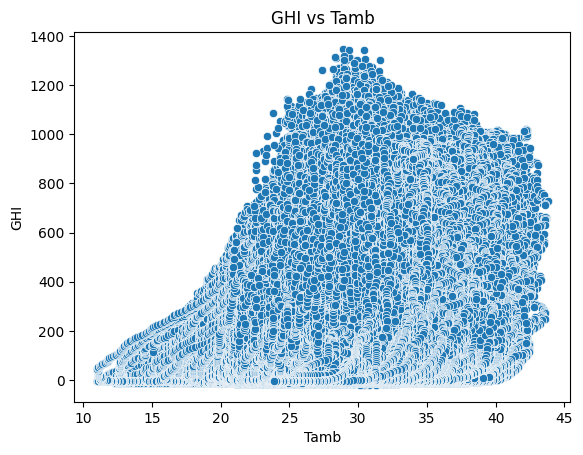

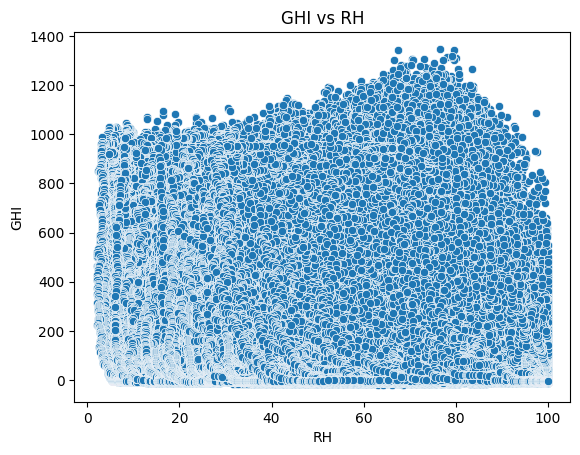

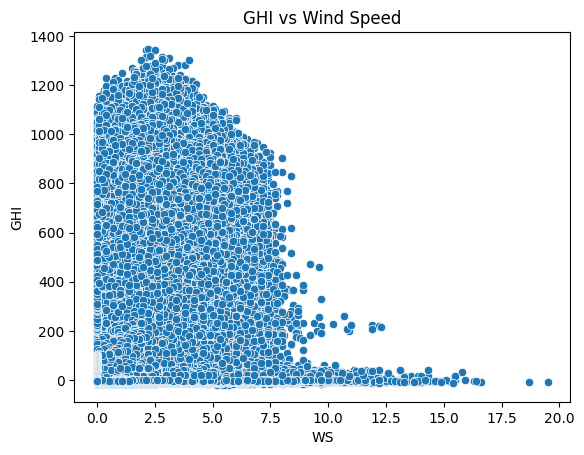

In [37]:
sns.scatterplot(data=df, x='Tamb', y='GHI')
plt.title("GHI vs Tamb")
plt.show()

sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("GHI vs RH")
plt.show()

sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("GHI vs Wind Speed")
plt.show()


## 11. Pairplot (Sampled for Speed)

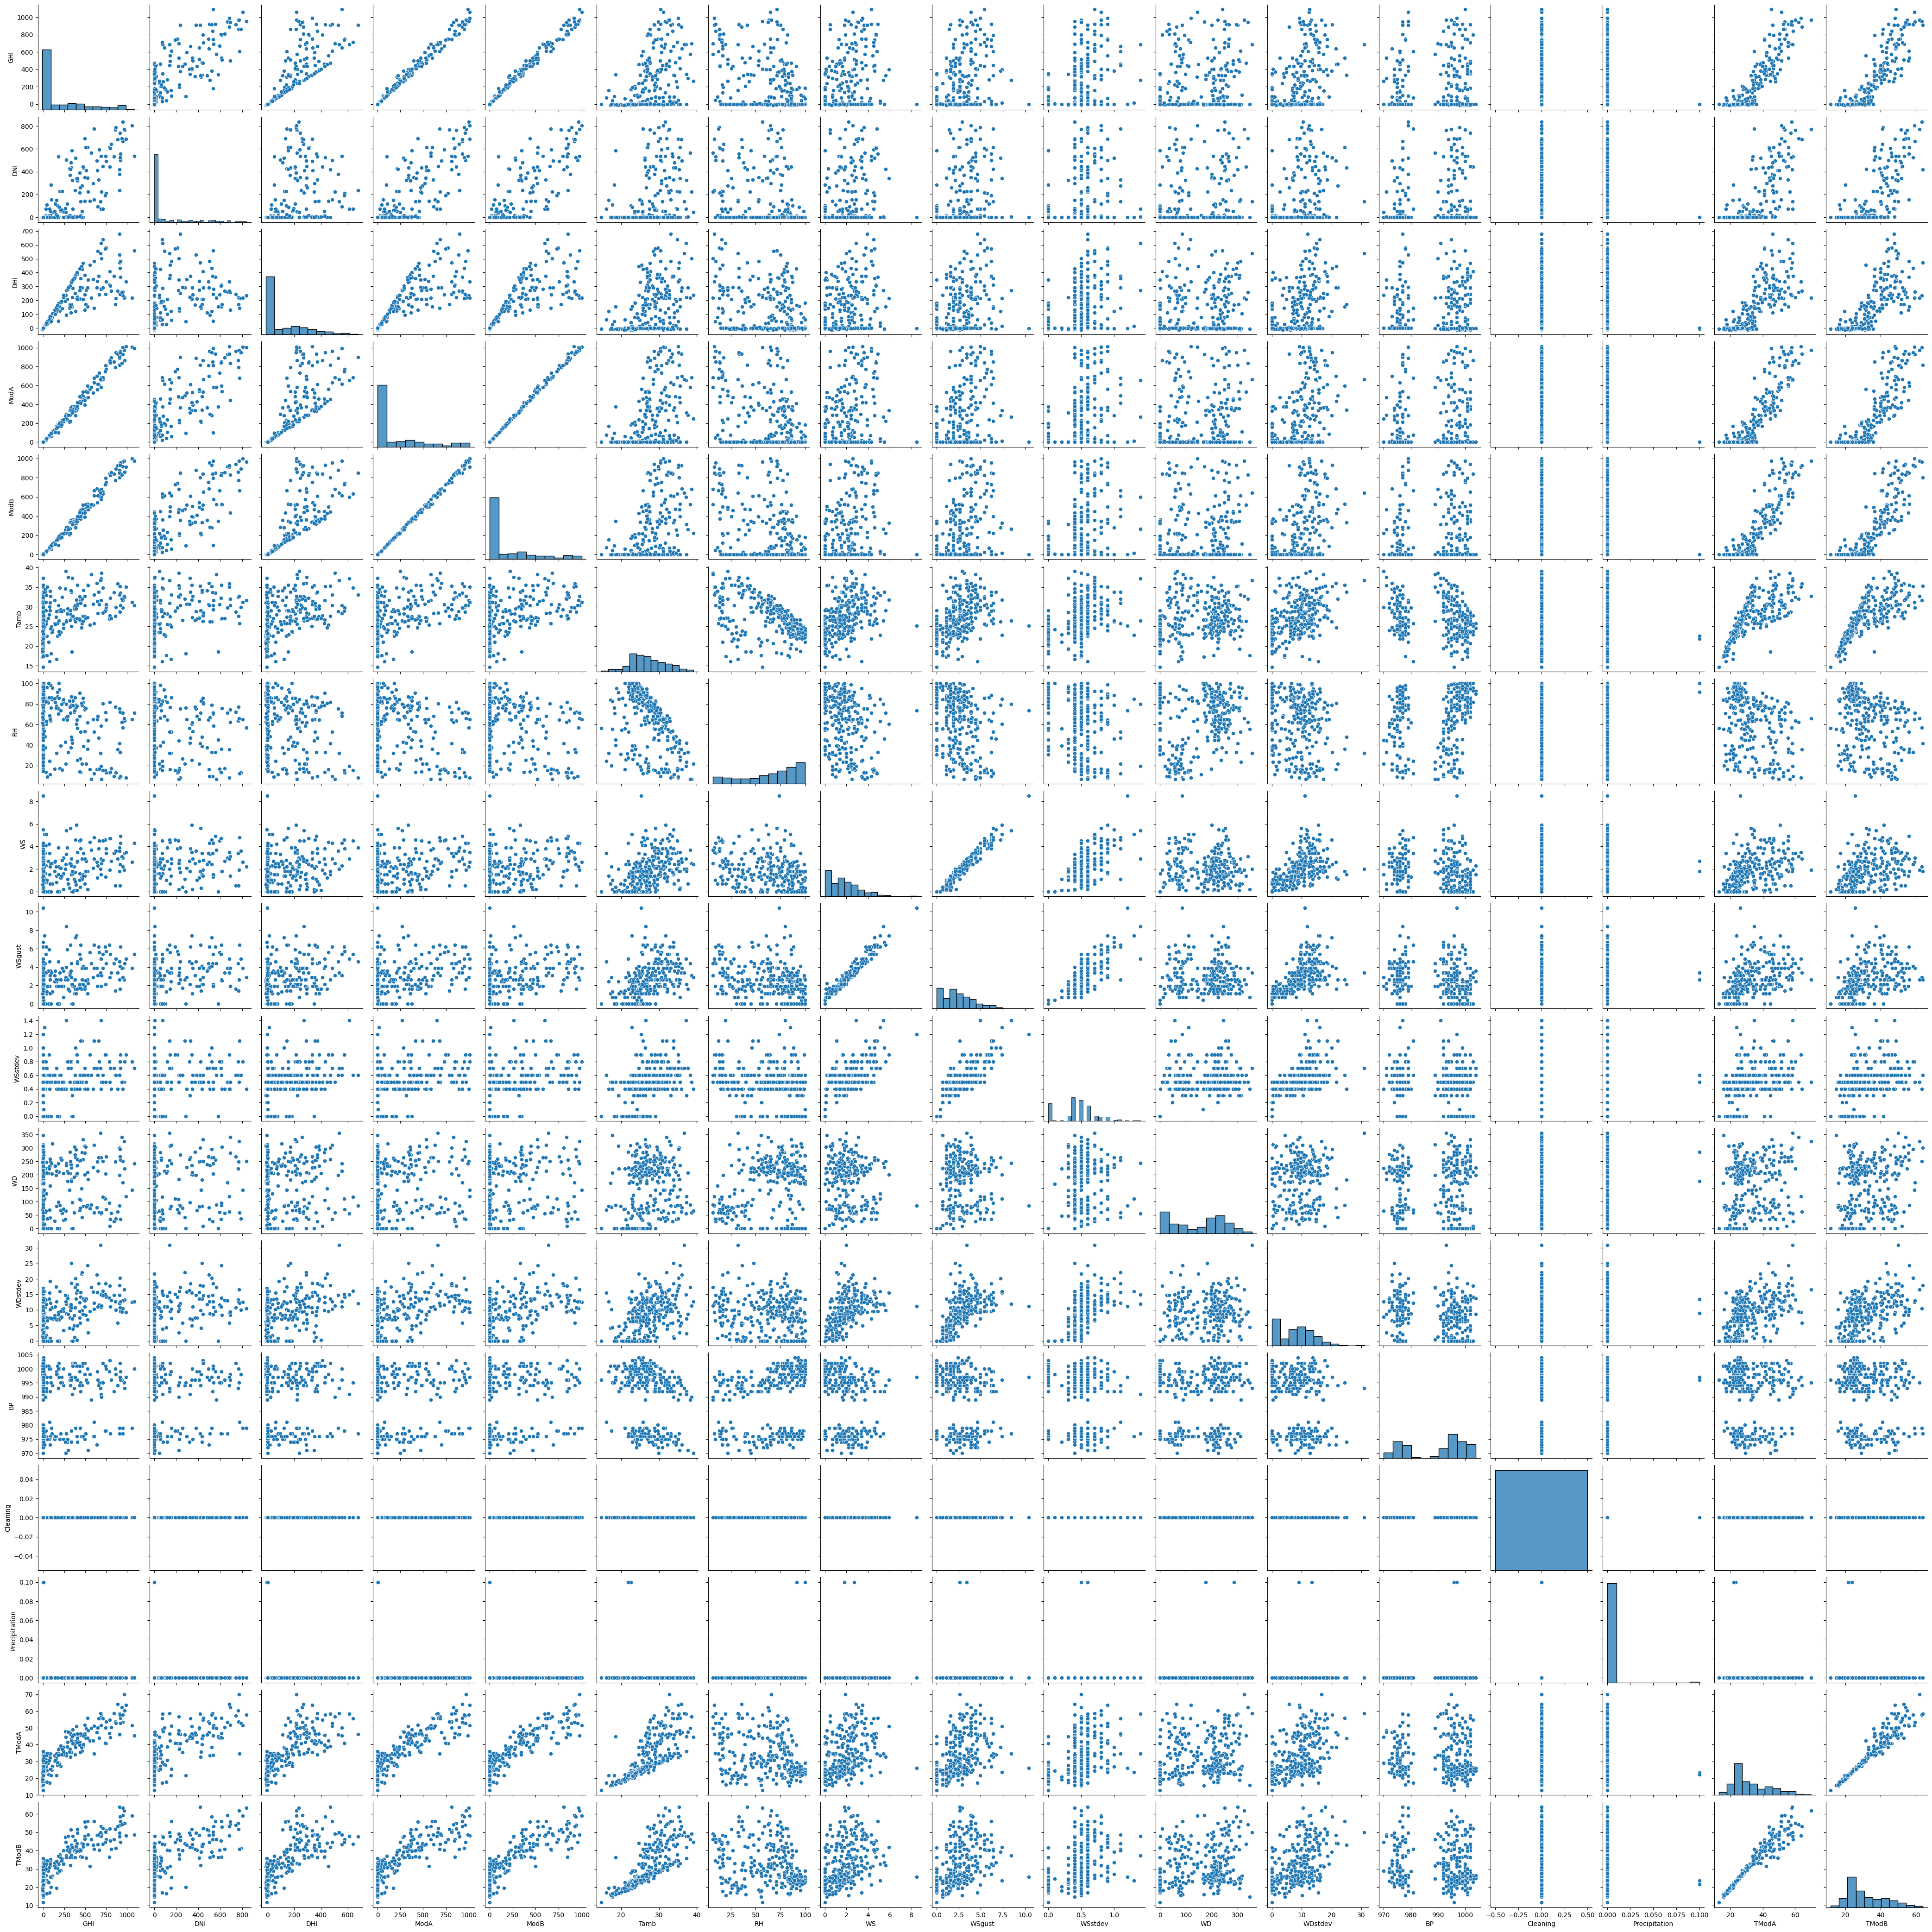

In [38]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

sample_df = df[numeric_cols].sample(min(300, len(df)))
sns.pairplot(sample_df)
plt.show()
